# Example 4: Urban adaptation benefit across different region


In [1]:
from pyclmuapp import pts_clmu
from pyclmuapp import usp_clmu
from pyclmuapp.getcity import *
import matplotlib.pyplot as plt
import pandas as pd
import os

## 1 PTS mode: using the CESM provide global data


Using the PTS mdoe to explore the urban adaptation potential of the 24 selected cities.

Only the high-density urban (HD) is considered in this experiment as HD has an obvious urban effect and is ubiquitous in each grid. Each HD urban surface parameter increased decreased 0.2 respectively, and then the differences of urban-related variables in case of changed parameters and default were compared. 

In [2]:
# Cities' lat and lon is from https://www.lboro.ac.uk/microsites/geography/gawc/world2020t.html
# and then use getcity.py to get the nearest grid cell in CESM
case_loc = {1: {'case_lat': '51.36', 'case_lon': '0.0', 'city': 'London'},
            2: {'case_lat': '40.05', 'case_lon': '-73.75', 'city': 'New_York'},
            3: {'case_lat': '40.05', 'case_lon': '116.25', 'city': 'Beijing'},
            4: {'case_lat': '22.15', 'case_lon': '113.75', 'city': 'Hong_Kong'},
            5: {'case_lat': '31.57', 'case_lon': '121.25', 'city': 'Shanghai'},
            6: {'case_lat': '35.34', 'case_lon': '140.0', 'city': 'Tokyo'},
            7: {'case_lat': '24.97', 'case_lon': '55.0', 'city': 'Dubai'},
            8: {'case_lat': '48.53', 'case_lon': '2.5', 'city': 'Paris'},
            9: {'case_lat': '1.41', 'case_lon': '103.75', 'city': 'Singapore'},
            10: {'case_lat': '53.25', 'case_lon': '6.25', 'city': 'Amsterdam'},
            11: {'case_lat': '-6.13', 'case_lon': '106.25', 'city': 'Jakarta'},
            12: {'case_lat': '18.38', 'case_lon': '-98.75', 'city': 'Mexico_City'},
            13: {'case_lat': '-23.09', 'case_lon': '-46.25', 'city': 'Sao_Paulo'},
            14: {'case_lat': '50.42', 'case_lon': '3.75', 'city': 'Brussels'},
            15: {'case_lat': '3.3', 'case_lon': '101.25', 'city': 'Kuala_Lumpur'},
            16: {'case_lat': '45.71', 'case_lon': '8.75', 'city': 'Milan'},
            17: {'case_lat': '-33.46', 'case_lon': '151.25', 'city': 'Sydney'},
            18: {'case_lat': '41.94', 'case_lon': '-87.5', 'city': 'Chicago'},
            19: {'case_lat': '34.4', 'case_lon': '-118.75', 'city': 'Los_Angeles'},
            20: {'case_lat': '55.13', 'case_lon': '37.5', 'city': 'Moscow'},
            21: {'case_lat': '43.82', 'case_lon': '-78.75', 'city': 'Toronto'},
            22: {'case_lat': '50.42', 'case_lon': '8.75', 'city': 'Frankfurt'},
            23: {'case_lat': '40.05', 'case_lon': '-3.75', 'city': 'Madrid'},
            24: {'case_lat': '19.32', 'case_lon': '72.5', 'city': 'Mumbai'}}

In [3]:
# initialize the pts_clmu object
def workflow(case_num):
    pts = pts_clmu(
        pwd=None,
        input_path="/home/zhonghua/p/scratch/CESMDATAROOT/inputdata",
        output_path="/home/zhonghua/p/scratch/CESMDATAROOT/Archive/lnd/hist",
        log_path="/home/zhonghua/p/scratch/CESMDATAROOT/CaseOutputs",
        scripts_path = "/home/zhonghua/p/scripts",
        container_type='docker')

    # set the case configuration
    pts.caseconfig['case_length'] = "3"
    pts.caseconfig['hist_nhtfrq'] = '1'
    pts.caseconfig['STOP_OPTION'] = "nmonths"
    pts.caseconfig['hist_mfilt']='240000' # large number to avoid output with more files
    pts.caseconfig['output_murban'] = 'True' # output the whole urban area weather (if True, the output the TBD, HD and MD urban)
    pts.caseconfig['mu_urban'] = "'TSA','RH2M'" # output the urban landunit 
    pts.caseconfig['RUN_STARTDATE'] = '2012-06-01'
    pts.caseconfig['DATM_CLMNCEP_YR_START'] = '2012'
    pts.caseconfig['DATM_CLMNCEP_YR_END'] = '2012'

    pts.caseconfig['case_name'] = case_loc[case_num]['city']
    pts.caseconfig['case_lat'] = case_loc[case_num]['case_lat']
    pts.caseconfig['case_lon'] = case_loc[case_num]['case_lon']
    # run the case
    pts_or=pts.run(iflog=True, cmdlogfile='pts_London.log')
    # modify the surface albedo of HD urban, numurbl=1; TBD urban, numurbl=0; MD urban, numurbl=2
    # action=0.2 means increase the albedo by 0.2
    pts.modify_surf(var="ALB_ROOF_DIR", action=0.2, numurbl=1) 
    pts_surf=pts.run(iflog=True, cmdlogfile='pts.log')
    pts.modify_surf(var="ALB_ROOF_DIR", action=-0.2, numurbl=1) 
    return pts_or, pts_surf

result_or = {}
result_surf= {}
for i in range(1, 25):
    result_or[i], result_surf[i] = workflow(i)
print(result_or)
print(result_surf)


The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified_London.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified_London.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified_New_York.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr2000_c190214_modified_New_York.nc.
The surface input file has been modified. The modified file is /p/scratch/CESMDATAROOT/inputdata/lnd/clm2/surfdata_map/release-c

In [4]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
df_plot = pd.DataFrame()

def open_res(dsfile):
    ds = xr.open_dataset(dsfile)
    ds = ds.assign_coords({'landunit': ds['land1d_ityplunit'].values}).sel(landunit=8)
    return ds


for i in range(1, 25):
    plotting_res = {}
    plotting_res['city'] = case_loc[i]['city']
    plotting_res['case_num'] = i
    plotting_res['lat'] = float(case_loc[i]['case_lat'])
    plotting_res['lon'] = float(case_loc[i]['case_lon'])
    ds = open_res(result_or[i][0])
    plotting_res['TSA'] = ds['TSA'].mean().values
    plotting_res['RH'] = ds['RH2M'].mean().values
    ds1 = open_res(result_surf[i][0])
    plotting_res['TSA_surf'] = ds1['TSA'].mean().values
    plotting_res['RH_surf'] = ds1['RH2M'].mean().values
    df_plot = df_plot.append(plotting_res, ignore_index=True)

df_plot.to_csv('example4.csv')
df_plot.head()

,city,case_num,lat,lon,TSA,RH,TSA_surf,RH_surf
0,London,1,51.36,0.00,290.27463,74.47812,290.17596,74.88281
1,New_York,2,40.05,-73.75,297.79132,68.583374,297.6874,68.97435
2,Beijing,3,40.05,116.25,299.26642,58.680374,299.11734,59.1256
3,Hong_Kong,4,22.15,113.75,302.09396,77.50493,302.01538,77.77857
4,Shanghai,5,31.57,121.25,301.162,72.778755,301.06674,73.14553


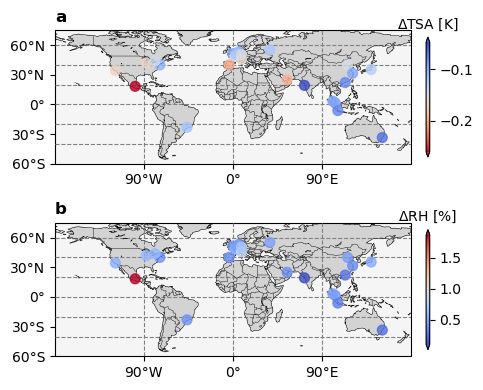

In [5]:
from src.plotmap import plotmap # import the plotmap function from floder src
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure(figsize=(8,4))
df_plot = pd.read_csv('example4.csv')
df_plot['Diff_TSA'] = df_plot['TSA_surf'] - df_plot['TSA']
df_plot['Diff_RH'] = df_plot['RH_surf'] - df_plot['RH']
for i in range(2):
    if i == 0:
        ax = fig.add_subplot(2, 1, i+1, projection=ccrs.PlateCarree())
        plotmap(x=df_plot['lon'], y=df_plot['lat'], c=df_plot['Diff_TSA'], title='$\Delta$TSA [K]', ax=ax, camp='coolwarm_r')
        ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
        ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
        ax.set_title('a', loc='left', weight='bold')
    elif i == 1:
        ax = fig.add_subplot(2, 1, i+1, projection=ccrs.PlateCarree())
        plotmap(x=df_plot['lon'], y=df_plot['lat'], c=df_plot['Diff_RH'], title='$\Delta$RH [%]', ax=ax, camp='coolwarm')
        ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
        ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
        ax.set_title('b', loc='left', weight='bold')

plt.tight_layout()
plt.savefig('figs/example4.pdf', dpi=188)
plt.show()